I grabbed the data on soybean from https://www.nass.usda.gov/Quick_Stats/Lite/index.php , thought it was much more intuitive than the traditional quickstats. I also found out that Minnesota is one of the top states for producing Soybeans, so let's see if I can do a little bit with this data and hopefully find ways to generalize these methods further on. 

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')
sns.set_style('whitegrid')
%matplotlib inline

In [24]:
soybeans = pd.read_csv('../data/SOYBEANS-AcreageYieldProductionandPrice-2019-11-10.csv')

In [25]:
soybeans.columns

Index(['YEAR', 'LOCATION', 'STATE ANSI', 'ASD CODE', 'COUNTY ANSI',
       'REFERENCE PERIOD', 'COMMODITY', 'AREA HARVESTED in ACRES',
       'AREA PLANTED in ACRES', 'PRODUCTION in BU', 'YIELD in BU / ACRE'],
      dtype='object')

In [26]:
soybeans['PRODUCTION in BU'] = soybeans['PRODUCTION in BU'].str.replace(',','').astype(int)

Text(0.5, 1.0, 'Soybean in Minnesota')

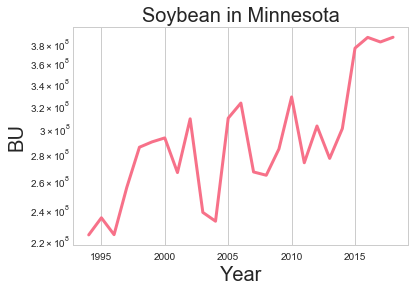

In [32]:
plt.plot(soybeans.groupby('YEAR')['PRODUCTION in BU'].sum(),linewidth=3)
plt.xlabel("Year",fontsize=20)
plt.ylabel("BU",fontsize=20)
plt.yscale('log')
plt.title("Soybean in Minnesota",fontsize=20)

Cool to get some form of a result, trouble is the columns are not as clean as before. Necessary tradeoff for a far easier data loading procedure. To fix this, I'll do the necessary cleaning below.

In [33]:
soybeans.head()

,YEAR,LOCATION,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,AREA HARVESTED in ACRES,AREA PLANTED in ACRES,PRODUCTION in BU,YIELD in BU / ACRE
0,1994,"MINNESOTA, CENTRAL, BENTON",27,50,009,YEAR,SOYBEANS,"12,700","12,800",444500,35.0
1,1994,"MINNESOTA, CENTRAL, CARVER",27,50,019,YEAR,SOYBEANS,"31,000","31,600",1178000,38.0
2,1994,"MINNESOTA, CENTRAL, KANDIYOHI",27,50,067,YEAR,SOYBEANS,"107,500","109,700",4622500,43.0
3,1994,"MINNESOTA, CENTRAL, MCLEOD",27,50,085,YEAR,SOYBEANS,"87,600","90,300",3679200,42.0
4,1994,"MINNESOTA, CENTRAL, MEEKER",27,50,093,YEAR,SOYBEANS,"96,600","98,600",4250400,44.0


In [34]:
soybeans['State'] = soybeans['LOCATION'].apply(lambda z: z.split(',')[0])

To coincide these with other counties, the official way is STATE ANSI , COUNTY ANSI this will correspond to the official location. 